In [10]:
import os
import glob
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cmocean.cm as cmo

In [2]:
files = sorted(glob.glob('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/composite_*.nc'))

In [17]:
for i in range(1):#len(files)):
    
    ds = xr.open_dataset(files[i])
    
    period1_avg = ds['HMXL'].isel(time=slice(0,35)).mean(dim='time')  
    period2_avg = ds['HMXL'].isel(time=slice(45,59)).mean(dim='time')
    difference = period2_avg - period1_avg
    
    difference
    
    #plt.figure()
    #difference.plot()
    #plt.show()

In [22]:
ds.HMXL.isel(time=0).values

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

```
for i in range(len(files)):
    
    ds = xr.open_dataset(files[i])
    
    period1_avg = ds['TEMP'].isel(time=slice(0,35)).mean(dim='time')  
    period2_avg = ds['TEMP'].isel(time=slice(45,59)).mean(dim='time')
    difference = period2_avg - period1_avg
    
    difference = difference.sel(z_t=slice(5.0000000e+02, 9.8470586e+04)).mean('z_t')
    
    plt.figure()
    difference.plot()
    plt.show()
```

In [ ]:
fig, axs = plt.subplots(len(files), figsize=(4, 3*len(files)))

for i, file in enumerate(files):
    ds = xr.open_dataset(file)
    
    period1_avg = ds['TEMP'].isel(time=slice(0,35)).mean(dim='time')  
    period2_avg = ds['TEMP'].isel(time=slice(45,59)).mean(dim='time')
    difference = period2_avg - period1_avg
    
    difference = difference.sel(z_t=slice(5.0000000e+02, 9.8470586e+04)).mean('z_t')
    
    difference.plot(ax=axs[i])
    axs[i].set_title(f'member '+file[-11:-3])

plt.tight_layout()
plt.show()

HMXL



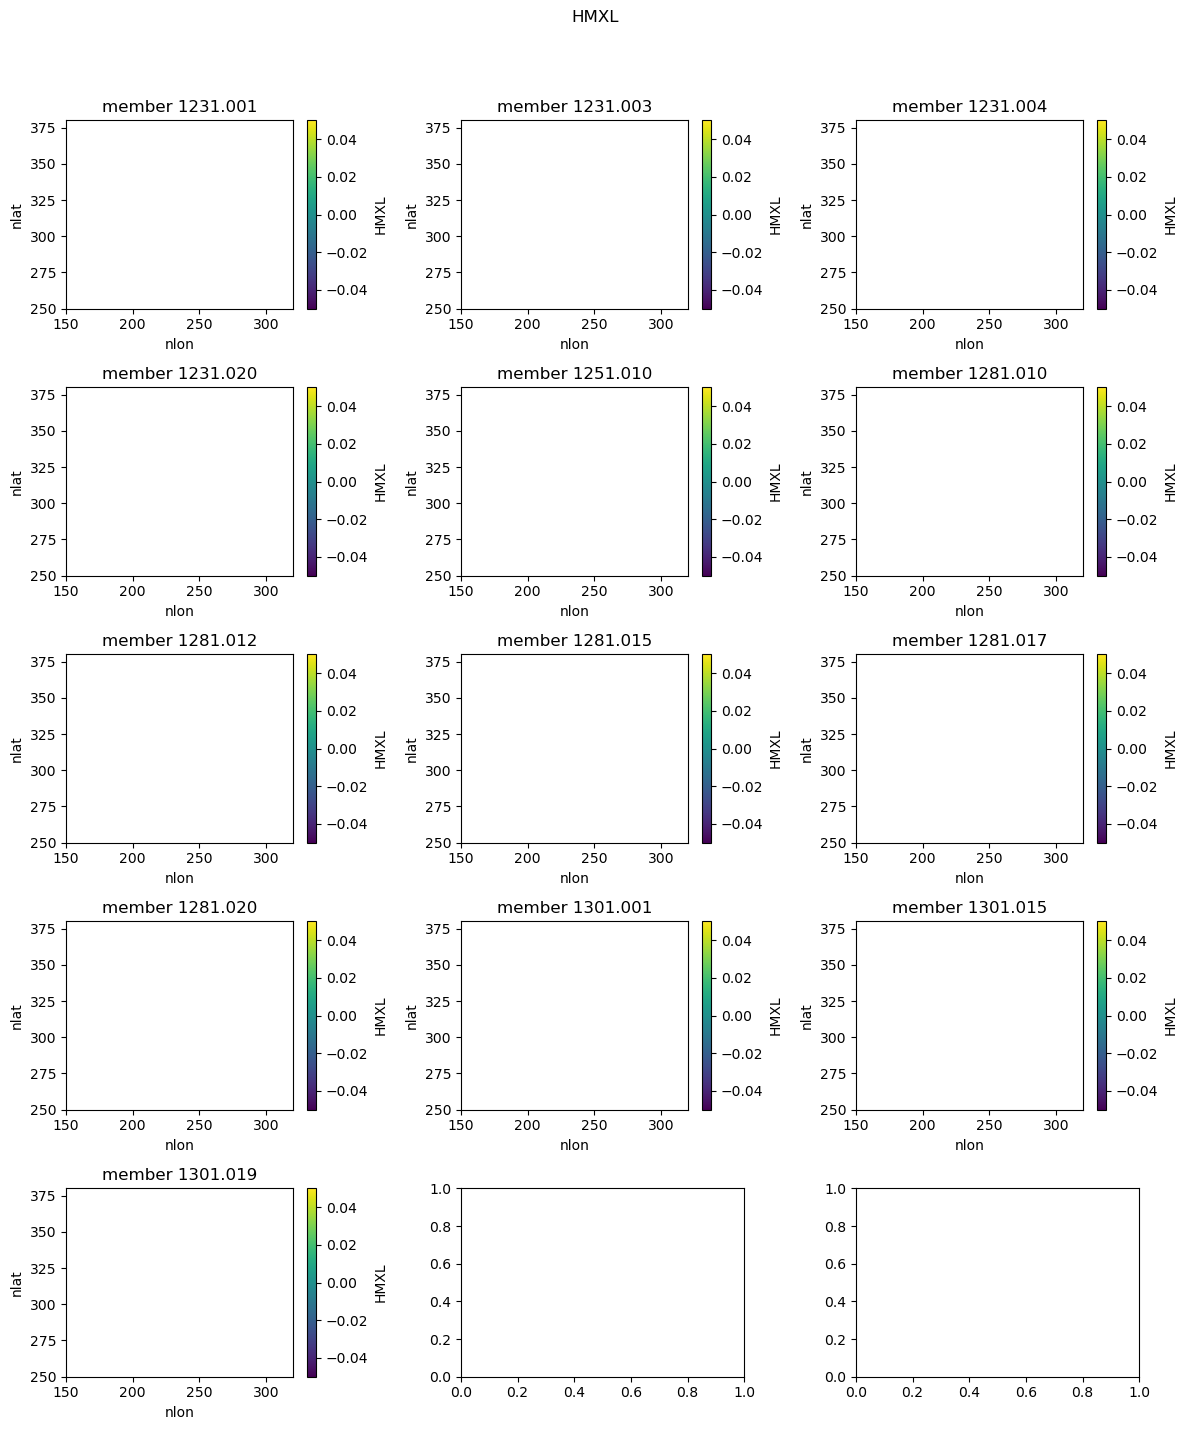

In [14]:
#variables = ['TEMP', 'SALT', 'SIGMA_2', 'VVEL', 'SSH', 'SHF', 'HMXL']
variables = ['HMXL']
num_columns = 3

total_files = len(files)
num_rows = total_files // num_columns + (1 if total_files % num_columns != 0 else 0)

for var in variables:
    print(var)
    print('')
    fig, axs = plt.subplots(num_rows, num_columns, figsize=(12, 3 * num_rows))

    for i, file in enumerate(files):
        ds = xr.open_dataset(file)

        period1_avg = ds[var].isel(time=slice(0, 35)).mean(dim='time')
        period2_avg = ds[var].isel(time=slice(45, 59)).mean(dim='time')
        difference = period2_avg - period1_avg
        if var in ('TEMP', 'SALT', 'SIGMA_2', 'VVEL'):
            difference = difference.sel(z_t=slice(5.0000000e+02, 9.8470586e+04)).mean('z_t')

        row = i // num_columns
        col = i % num_columns
        difference.plot(ax=axs[row, col])
        axs[row, col].set_title(f'member {file[-11:-3]}')
        axs[row, col].set_xlim(150, 320)
        axs[row, col].set_ylim(250, 380)

    plt.suptitle(var)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
    #plt.savefig(os.path.expanduser('~/phase1_CONDA/results/')+var+'_single_anomaly.png', bbox_inches='tight', dpi=300)